## Practicle Lab 01
### JAY SINDHAL (8963474)
### Section 01




# Univariate Linear Regression on California Housing Prices

## Framing the Problem
The goal of this report is to analyze the relationship between the median house value in California and three independent variables: **median income**, **population**, and **number of households**. We aim to build and evaluate three univariate linear regression models to predict the median house value based on each of these variables. The best model will be selected based on its goodness-of-fit and error metrics.

---

## Getting the Data
The dataset used in this analysis is the **California Housing Prices Dataset**, which can be accessed [here](https://www.kaggle.com/datasets/camnugent/california-housing-prices). The data is loaded into a Pandas DataFrame for further analysis.

In [6]:
# Import crucial libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
data = pd.read_csv(url)

# Display the first 5 rows of the dataset
data.head()

Matplotlib is building the font cache; this may take a moment.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Exploratory Data Analysis (EDA)
###
 Dataset Statistics
We begin by exploring the dataset using the describe function to understand the distribution and summary statistics of the variables.

In [7]:
# Summary statistics of the dataset
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Scatter Plots
Below are three scatter plots illustrating the relationships between the median house value and the independent variables: median income, population, and number of households. Observing the data visually helps us understand potential correlations.

Used the references from [statology](https://www.statology.org/seaborn-subplots/)

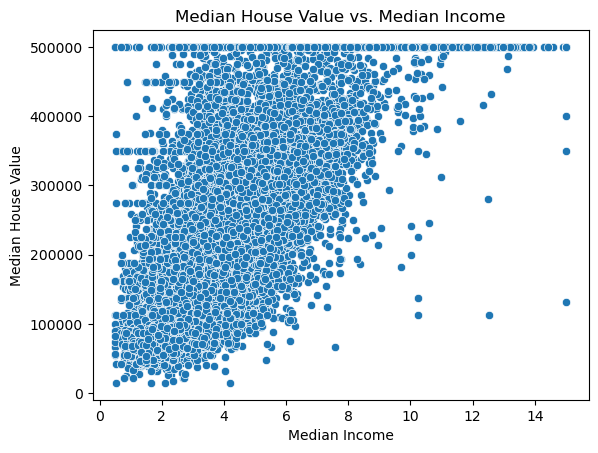

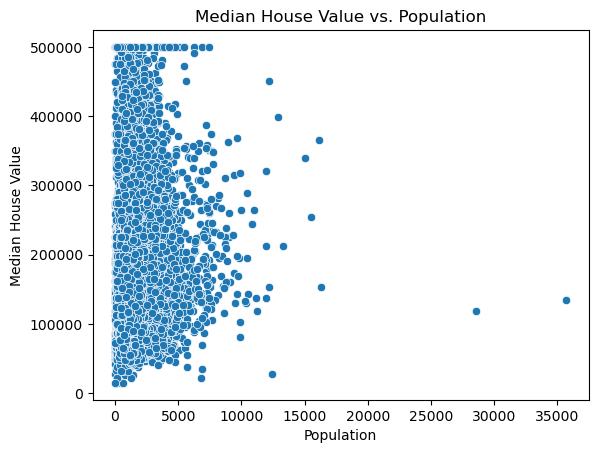

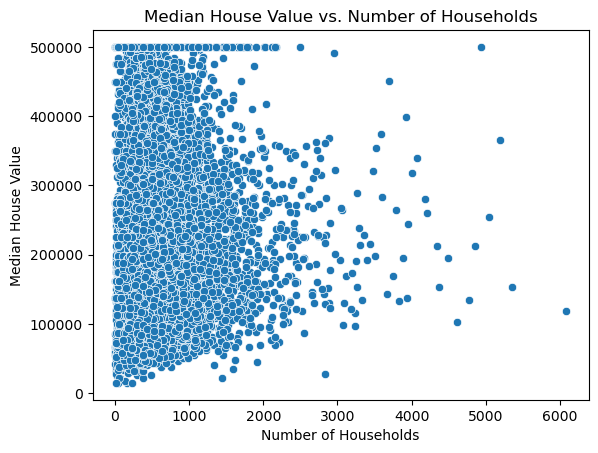

In [8]:
# Scatter plot: Median House Value vs. Median Income
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Scatter plot: Median House Value vs. Population
sns.scatterplot(x='population', y='median_house_value', data=data)
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

# Scatter plot: Median House Value vs. Number of Households
sns.scatterplot(x='households', y='median_house_value', data=data)
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

### **Insights:**

**Median Income:** There is a positive linear link between median income and median house value, showing that higher income areas tend to have higher house values.

**Population:** The connection between the number of people and average house value is not very clear and doesn't show a strong pattern.

**Number of Households**: Like the population, the number of households does not have a clear connection to the typical house value.

### Variable Descriptions
**Median House Value:** The dependent variable, representing the median value of houses in a block. Range: 
14,999to500,001.

**Median Income:** The median income of households in a block. Range: 0.4999 to 15.0001.

**Population:** The total population in a block. Range: 3 to 35,682.

**Number of Households:** The total number of households in a block. Range: 1 to 6,082.

#  Run three linear regressions (fitting) between
## Linear Regression Models
We fitted three univariate linear regression models to analyze the relationships between the median house value and each independent variable. Below are the results for each model:

Intercept and Slope: These define the linear equation.
Mean Squared Error (MSE) and Mean Absolute Error (MAE): These are metrics used to evaluate the goodness-of-fit of the model.
References Used:[W3schools](https://www.w3schools.com/Python/python_ml_linear_regression.asp)

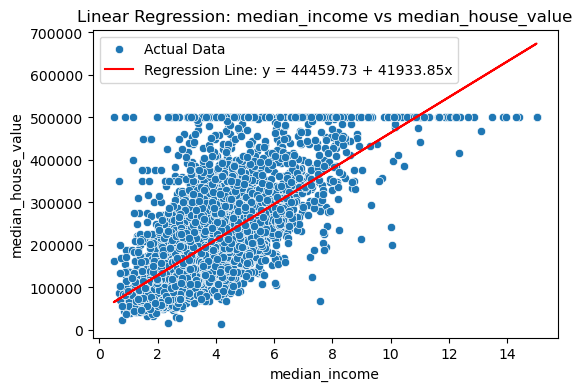

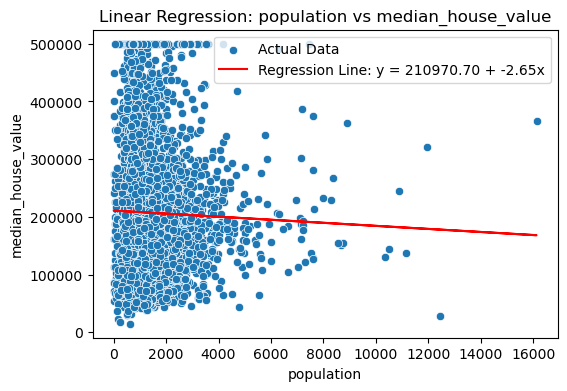

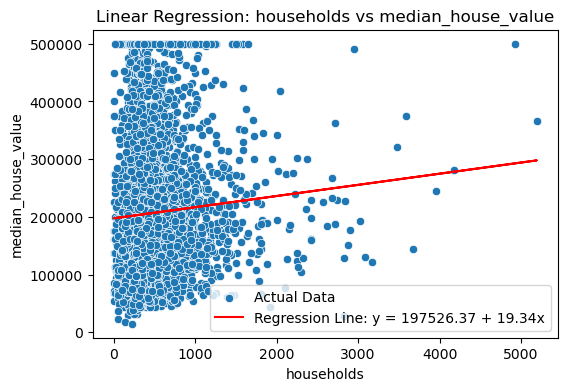

,Variable,Intercept,Slope,MSE,MAE
0,median_income,44459.729169,41933.849394,7.091158e+09,62990.865301
1,population,210970.696345,-2.647127,1.310287e+10,90588.877725
2,households,197526.369197,19.337155,1.303558e+10,90218.258138


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Define function for running regression
def run_regression(independent_var, dependent_var='median_house_value'):
    X = data[[independent_var]]
    y = data[dependent_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    intercept = model.intercept_
    slope = model.coef_[0]
    
    # Plot regression line
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_test[independent_var], y=y_test, label="Actual Data")
    plt.plot(X_test, y_pred, color='red', label=f"Regression Line: y = {intercept:.2f} + {slope:.2f}x")
    plt.xlabel(independent_var)
    plt.ylabel(dependent_var)
    plt.title(f"Linear Regression: {independent_var} vs {dependent_var}")
    plt.legend()
    plt.show()
    
    # Return the results as a dictionary
    return {'Variable': independent_var, 'Intercept': intercept, 'Slope': slope, 'MSE': mse, 'MAE': mae}

# Run regression for each variable
results = []
for var in ['median_income', 'population', 'households']:
    result = run_regression(var)  # Ensure the function returns a result
    results.append(result)  # Append the result to the list

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display DataFrame in Jupyter Notebook
from IPython.display import display
display(results_df)



## Summary and Recommendations
**Best Model:** The model using median income as the independent variable performs the best, with the lowest MSE and MAE values. It also shows a clear linear relationship with the median house value.

**Insights:** Median income is a strong predictor of median house value, while population and number of households are less effective predictors. This suggests that economic factors play a significant role in determining house prices in California.

**Recommendation:** For predicting median house values, the model based on median income should be prioritized due to its superior performance and interpretability.

**key findings:**
The number of households shows a weak positive correlation with house prices. While the positive slope indicates that more households slightly increase housing prices, the effect is not as strong as income, and the overall predictive power of this feature is relatively low.

**conclusion:**
Our analysis leads us to these findings:

Median Income stands out as the best predictor of median house value. It shows a clear linear relationship and has lower error measurements.
Population and Number of Households don't predict as well. They have higher error values, and their connections to median house value aren't as straightforward.
So when we want to guess housing prices in this dataset later on, median income gives us the most trustworthy information out of these three factors we looked at.